# Housing Data Analysis Project Overview

This notebook will analyze data from the King County House Sales dataset. This dataset contains various information on homes in King County. I will use this data in order to create linear regression models with the purpose of determining which features are most relevant in predicting housing prices. I will then examine the models' output and compare and contrast to determine which model performs best according to error metrics.

## Business Case/Problem

Hypothetical Situation: A King County real estate agency is looking to provide advice to home owners on what factors are most important in determining the value of their home. Using several multiple linear regression models I will examine which independant variables are most useful at predicting the dependant variable of home price. The regression models will help in providing home owners with relevant information regarding the price of their home should they be interested in listing their home with the real estate agency. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import metrics
from sklearn.neighbors import DistanceMetric
from math import radians
import warnings
warnings.filterwarnings('ignore')

## Functions

In [2]:
#Function to drop unimportant columns from the dataframe.
def filter_columns(df):
    columns_to_keep = ['price','bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'floors', 
                   'condition',
                  'grade',
                  'sqft_above',
                  'yr_built',
                  'zipcode',
                       'sqft_living15',
                       'sqft_lot15',
                      'lat',
                      'long']
    return df[columns_to_keep]

In [3]:
def histograms(data):
    fig = plt.figure(figsize = (20,12))
    ax = fig.gca()
    data.hist(ax = ax);

In [4]:
def check_dist(column, title):
    sns.distplot(df_filtered[column], kde=True).set(title=title);

In [5]:
def boxplot(x, title):
    sns.boxplot(x=x, y='price', data=df_filtered).set(title=title);

In [6]:
def plot_scatter(y_test, resid, title):
    plt.figure(figsize=(12,8))
    plt.scatter(y_test, resid)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
    plt.title(title);

In [7]:
def ols_model(training_features):
    outcome = 'y_train'
    predictors = training_features
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum

    data = pd.concat([X_train, y_train], axis=1)

    #Create OLS Model to analyze Model A.
    model_ols = ols(formula=formula, data=data).fit()
    return model_ols.summary()

In [8]:
def plot_feature_imp(data, model, title, title_2):
    feat_imps_df = pd.DataFrame(
    zip(data.columns, model.coef_),
    columns=['Feature', 'Importance'],
    )

    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(x='Importance', y='Feature', 
            data=feat_imps_df.sort_values(by='Importance', key=abs, ascending=False), orient='h', ax=ax)
    plt.suptitle(title_2, fontsize=18)
    plt.title(title);

In [9]:
def errors(y_train, y_train_pred, y_test, y_test_pred):
    print('Train Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, y_train_pred)))
    print('Test Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_test_pred)))
    print('Train Mean Squared Error:', round(metrics.mean_squared_error(y_train, y_train_pred)))
    print('Test Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_test_pred)))
    print('Train Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
    print('Test Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))

In [10]:
def plot_model(test, test_pred, title):    
    plt.figure(figsize=(12,8))
    plt.scatter(test, test_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title);

In [11]:
#Create a function to determine the distance of the homes from a certain point (Seattle).
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

## Data Description
The data used in this project will provide the following information:

 - ID - unique identified for a house

 - Date - house was sold

 - Price - is prediction target

 - Bedrooms - number of Bedrooms/House

 - Bathrooms - number of bathrooms/bedrooms

 - Sqft_livingsquare - footage of the home

 - Sqft_lotsquare - footage of the lot

 - FloorsTotal - floors (levels) in house

 - Waterfront - House which has a view to a waterfront

 - View - Has been viewed

 - Condition - How good the condition is ( Overall )

 - Grade - overall grade given to the housing unit, based on King County grading system

 - Sqft_above - square footage of house apart from basement

 - Sqft_basement - square footage of the basement

 - Yr_built - Built Year

 - Yr_renovated - Year when house was renovated

 - Zipcode - zip

 - Lat - Latitude coordinate

 - Long - Longitude coordinate

 - Sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

 - Sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Load Data

In [12]:
#Load the Kings County housing data for analysis.
df = pd.read_csv('data/kc_house_data.csv')

In [13]:
df.shape

(21597, 21)

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
# Review remaining columns to see which ones make the most sense to keep.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Cleaning

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Features to remove: 
- 'yr_renovated': large number of missing data.
- 'date': likely not relevant to business problem.
- 'id': likely not relevant to business problem.
- 'waterfront': large number of missing data.
- 'view': likely not relevant to business problem.
- 'yr_renovated': likely not relevant to business problem.
- 'lat': likely not relevant to business problem.
- 'long': likely not relevant to business problem.
- 'sqft_living15': already have data on sqft living.
- 'sqft_lot15': already have data on sqft lot.

In [17]:
#Create new dataframe containing only relevant features.
df_filtered = filter_columns(df)

In [18]:
#Review new dataeframe for analysis.
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  zipcode        21597 non-null  int64  
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


In [19]:
df_filtered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845,1986.620318,12758.283512,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072,685.230472,27274.441950,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,399.000000,651.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,1490.000000,5100.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,1840.000000,7620.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,2360.000000,10083.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,6210.000000,871200.000000,47.777600,-121.315000


## Data Exploration

In [20]:
#Set graph style
plt.style.use('fivethirtyeight')

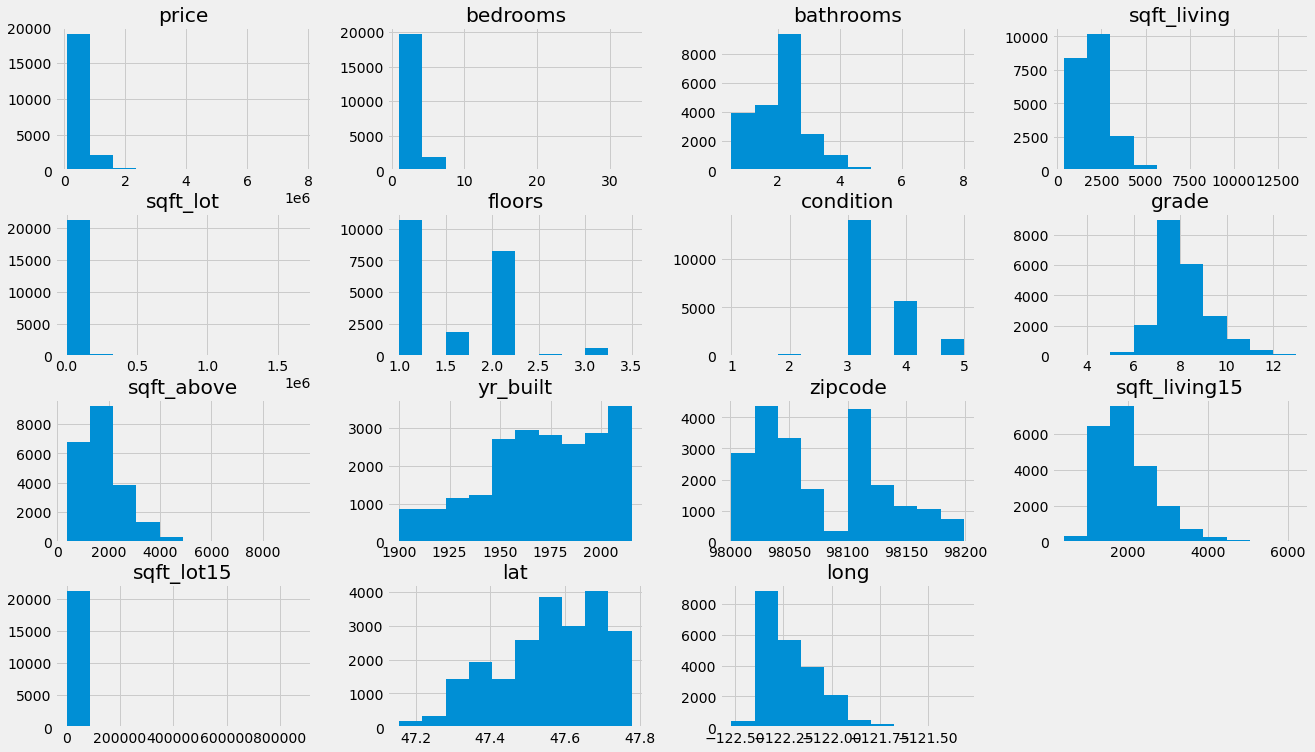

In [21]:
#Create histograms to analyze the distribution of the features:
histograms(df_filtered)

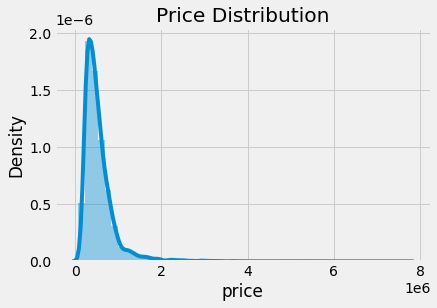

In [22]:
check_dist('price', 'Price Distribution')

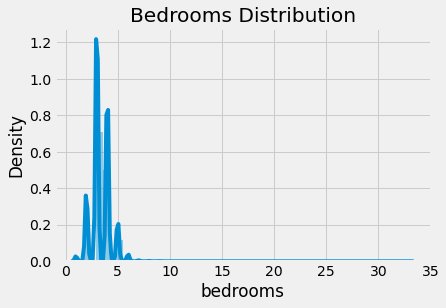

In [23]:
check_dist('bedrooms', 'Bedrooms Distribution')

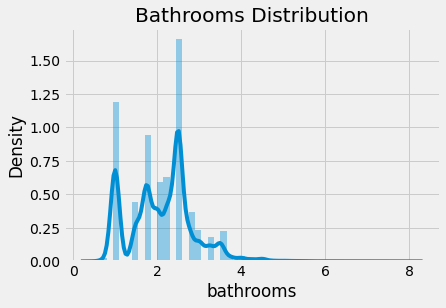

In [24]:
check_dist('bathrooms', 'Bathrooms Distribution')

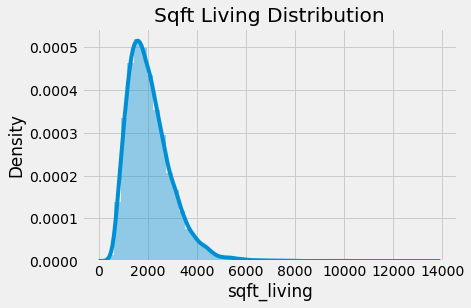

In [25]:
check_dist('sqft_living', 'Sqft Living Distribution')

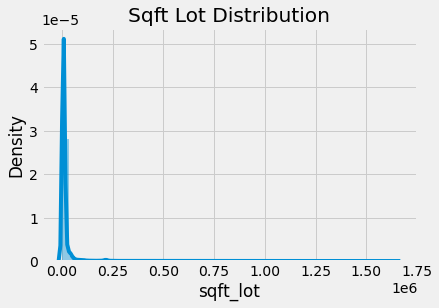

In [26]:
check_dist('sqft_lot', 'Sqft Lot Distribution')

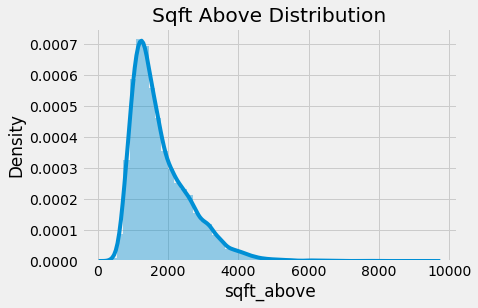

In [27]:
check_dist('sqft_above', 'Sqft Above Distribution')

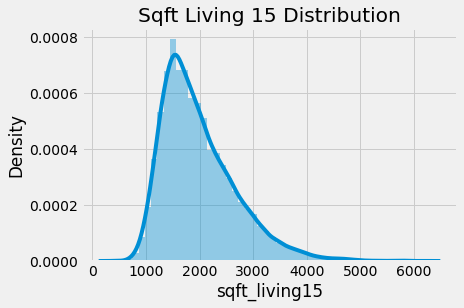

In [28]:
check_dist('sqft_living15', 'Sqft Living 15 Distribution')

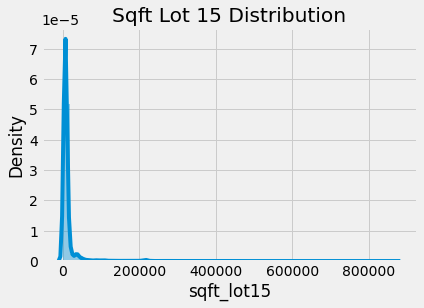

In [29]:
check_dist('sqft_lot15', 'Sqft Lot 15 Distribution')

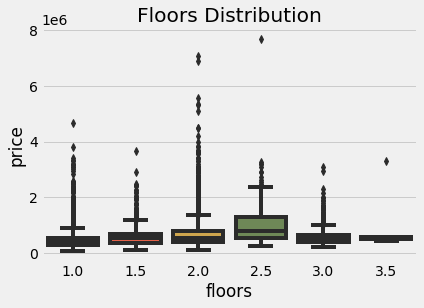

In [30]:
boxplot('floors', 'Floors Distribution')

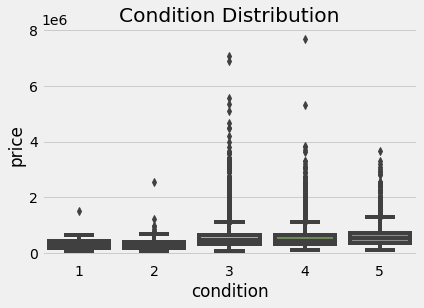

In [31]:
boxplot('condition', 'Condition Distribution')

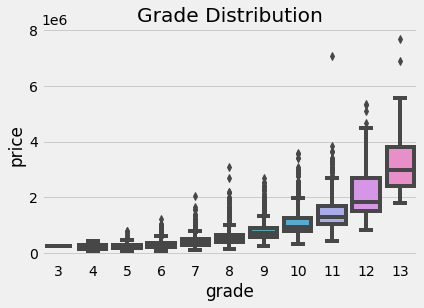

In [32]:
boxplot('grade', 'Grade Distribution')

 - 'price', 'bedrooms', 'bathrooms', sqft_living', 'sqft_lot', and 'sqft_above', 'sqft_living15', 'sqft_lot15', 'and 'yr_built' are not evenly distributed. This is likely due to outliers in the data. Outliers will need to be removed for these and some may need to be log transformed.

 - 'bedrooms', 'bathrooms', 'zipcode', 'floors', and 'condition' could be considered categorical data, which will need to be addressed later. Will likely leave 'grade' as numerical data since it appears that a higher grade equates to a higher home price.

### Check for Multicollinearity

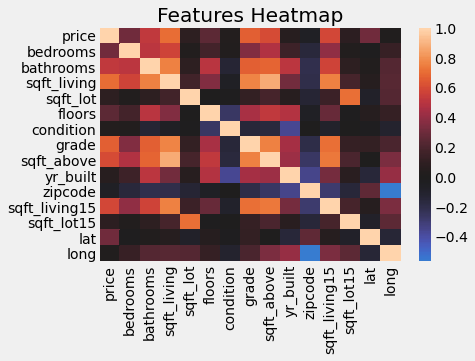

In [33]:
#Created heatmap to determine the multicollinearity of the features. 
sns.heatmap(df_filtered.corr(), center=0).set(title='Features Heatmap');

 - 'sqft_above' and 'sqft_living' are closely related to each other and should not be included together in any models.

# Model A (Vanilla Classifier)

 - Will create a basic model without transforming any features just to get an idea of how the data performs. 

In [34]:
df_filtered['zipcode'] = df_filtered['zipcode'].astype('str')
df_filtered['yr_built'] = df_filtered['yr_built'].astype('int64')

In [35]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df_filtered[['zipcode']]))
ohe_df.columns = ohe.get_feature_names(['zipcode'])
df_filtered.drop(['zipcode'] ,axis=1, inplace=True)
ohe_df = pd.concat([df_filtered.reset_index(drop=True), ohe_df.reset_index(drop=True)],axis=1)
#X_train_ohe.head()
ohe_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,1530,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,5813,2.0,3,8,2310,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,1350,2.0,3,7,1020,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,2388,2.0,3,8,1600,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Data into Training and Test set

In [36]:
#Seperate data into training and testing sets for analysis:
y = ohe_df['price']
X = ohe_df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, y_train.shape

((17277, 83), (17277,))

In [38]:
X_test.shape, y_test.shape

((4320, 83), (4320,))

In [39]:
#Model A feature selection:
features_train_a = pd.DataFrame(data=X_train, columns=['bedrooms', 'bathrooms', 'sqft_living', 'grade'])
features_test_a = pd.DataFrame(data=X_test, columns=['bedrooms', 'bathrooms', 'sqft_living', 'grade'])

## Model A Training

In [40]:
ols_model(features_train_a)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5184.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:43:31   Log-Likelihood:            -2.3917e+05
No. Observations:               17277   AIC:                         4.783e+05
Df Residuals:                   17272   BIC:                         4.784e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.87e+05    1.7e+04    -28.689      0.000    -5.2e+05   -4.54e+05
bedrooms    -4.335e+04   2685.131    -16.143      0.000   -4.86e+04   -3.81e+04
bathrooms   -2.448e+04   3936.106     -6.219      0.000   -3.22e+04   -1.68e+04
sqft_living   227.8517      4.065     56.054      0.000     219.884     235.819
grade        9.819e+04   2607.614     37.654      0.000    9.31e+04    1.03e+05
==============================================================================
Omnibus:                    12674.639   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           584848.422
Skew:                           3.045   Prob(JB):                         0.00
Kurtosis:                      30.845   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model_a = LinearRegression()
model_a.fit(features_train_a, y_train)

LinearRegression()

In [42]:
print(model_a.intercept_)

-487046.2750142581


In [43]:
model_a.coef_

array([-43346.87097738, -24480.19836325,    227.8517448 ,  98187.07710573])

In [44]:
coef_df_a = pd.DataFrame(model_a.coef_, features_train_a.columns, columns = ['Model A Coefficents']) 

In [45]:
coef_df_a

,Model A Coefficents
bedrooms,-43346.870977
bathrooms,-24480.198363
sqft_living,227.851745
grade,98187.077106


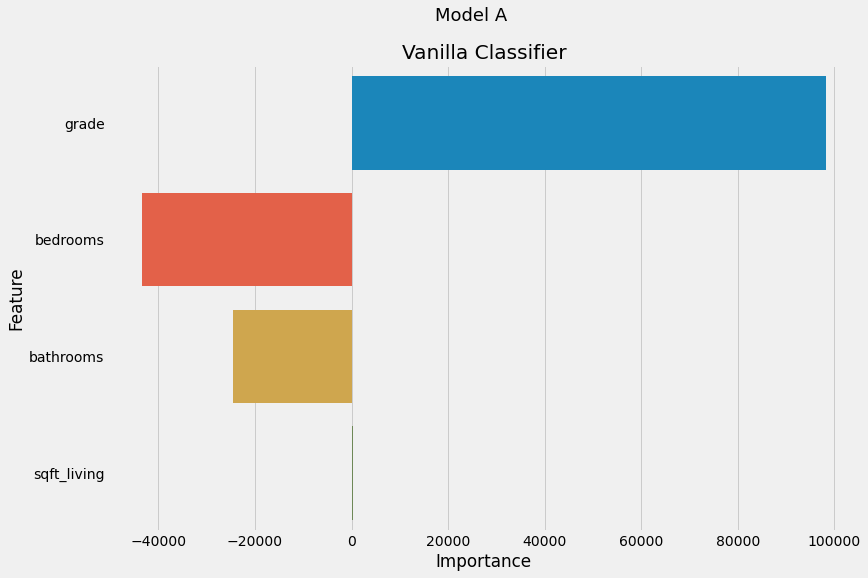

In [46]:
plot_feature_imp(features_train_a, model_a, 'Vanilla Classifier', 'Model A')

In [47]:
#Run model on training and testing data.
y_train_pred_a = model_a.predict(features_train_a)
y_test_pred_a = model_a.predict(features_test_a)

In [48]:
errors(y_train, y_train_pred_a, y_test, y_test_pred_a)

Train Mean Absolute Error: 163322
Test Mean Absolute Error: 160590
Train Mean Squared Error: 61861240256
Test Mean Squared Error: 60591750009
Train Root Mean Squared Error: 248719
Test Root Mean Squared Error: 246154


 - On average Model A predicts home prices within $160,590 of the true value.

In [49]:
#Calculate Model A residuals in order to use for graphs.
resid_a = y_test_pred_a - y_test

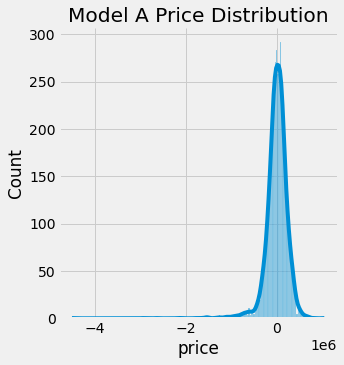

In [50]:
#Create distribution plot to check Model A's distribution of prices.
sns.displot(x=resid_a,kind='hist',kde=True)
plt.title('Model A Price Distribution');

 - Model A's distribution shows a long tail in the lower price range to the left of the median price, likely indicating the prescence of outliers and confirming that the data is not evenly distributed.

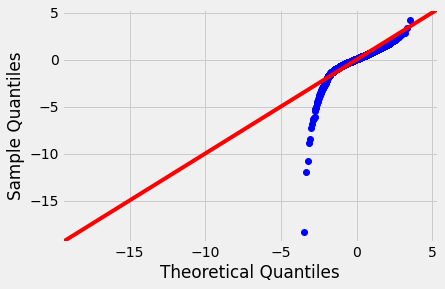

In [51]:
#Create qq plot to further analyze the distribution of the data.
fig = sm.graphics.qqplot(resid_a, dist=stats.norm, line='45',fit=True)

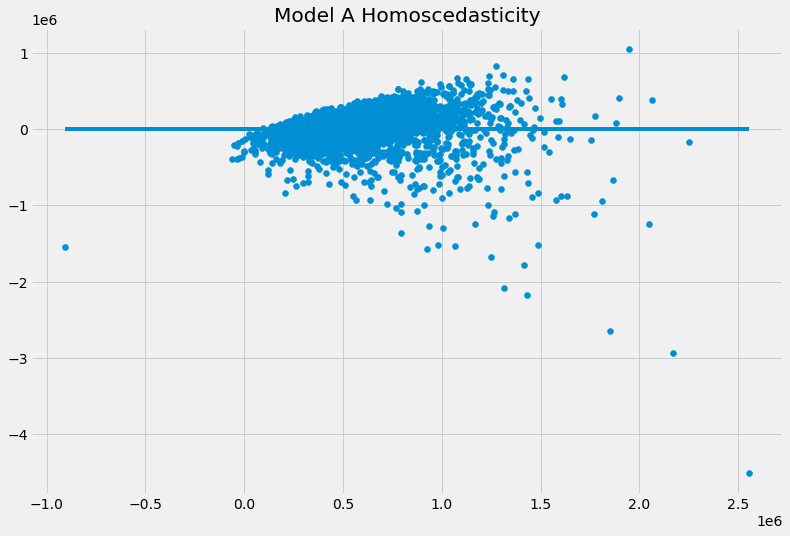

In [52]:
plot_scatter(y_test_pred_a, resid_a, 'Model A Homoscedasticity')

The data appears to be bunched to the left and appears to be heteroscedastic.

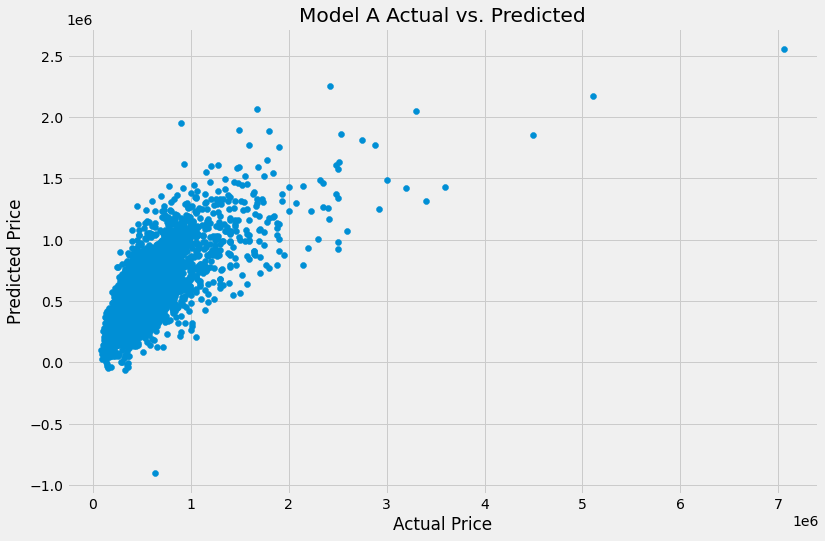

In [53]:
plot_model(y_test, y_test_pred_a, 'Model A Actual vs. Predicted')

 - The actual vs. predicted chart shows that Model A does not appear to follow a strong linear pattern. 

## Model A Evaluation

 - Model A produces p-values of 0 for each feature indicating that there likely is a relationship between the features and the target, which allows us to reject the null hypothesis for these features.  Model A, however, also produces a low R-squared value of .546, indicating that only about 54% of the model's observed variance can be explained by its inputs. Model A also produces a high Skew of 3.045, indicating that the data is not evenly distributed and will need to be transformed. Model A also has a high Kurtosis of 30.845 indicating a heavy tail and the presance of outliers.   

# Model B

## Model B Training

In [54]:
#Model B training & testing features:
features_train_b = X_train.drop(['sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_living15',
                            'sqft_lot15', 'lat', 'long'], axis=1)
features_test_b = X_test.drop(['sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_living15',
                            'sqft_lot15', 'lat', 'long'], axis=1)

In [55]:
#Scale testing and training features
scale_features = StandardScaler()
scale_features.fit(features_train_b)
X_train_scaled_b = scale_features.transform(features_train_b)
X_test_scaled_b = scale_features.transform(features_test_b)

In [56]:
X_train_scaled_b

array([[ 0.69120327, -0.14923285, -0.70134184, ..., -0.08041312,
        -0.1140908 , -0.12384872],
       [-0.41452996, -0.47489864, -0.71224073, ..., -0.08041312,
        -0.1140908 , -0.12384872],
       [ 0.69120327,  0.8277645 ,  1.12967201, ..., -0.08041312,
        -0.1140908 , -0.12384872],
       ...,
       [ 0.69120327, -0.80056442, -0.60325181, ..., -0.08041312,
        -0.1140908 , -0.12384872],
       [-2.62599643, -1.77756177, -1.85662439, ..., -0.08041312,
        -0.1140908 , -0.12384872],
       [ 0.69120327,  0.50209871,  0.73186246, ..., -0.08041312,
        -0.1140908 , -0.12384872]])

In [57]:
X_train_scaled_b = pd.DataFrame(X_train_scaled_b, columns = features_train_b.columns)

In [58]:
X_train_scaled_b.head()

,bedrooms,bathrooms,sqft_living,yr_built,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.691203,-0.149233,-0.701342,0.035248,-0.129046,-0.093899,-0.113569,-0.120925,-0.089074,-0.150769,...,-0.114091,-0.053331,-0.143585,-0.111725,-0.110658,-0.108494,-0.112782,-0.080413,-0.114091,-0.123849
1,-0.414530,-0.474899,-0.712241,0.307771,-0.129046,-0.093899,-0.113569,-0.120925,-0.089074,-0.150769,...,-0.114091,-0.053331,-0.143585,-0.111725,-0.110658,-0.108494,-0.112782,-0.080413,-0.114091,-0.123849
2,0.691203,0.827764,1.129672,1.329731,-0.129046,-0.093899,-0.113569,-0.120925,-0.089074,-0.150769,...,-0.114091,-0.053331,-0.143585,-0.111725,-0.110658,-0.108494,-0.112782,-0.080413,-0.114091,-0.123849
3,0.691203,0.502099,-0.025611,0.103379,-0.129046,-0.093899,-0.113569,-0.120925,-0.089074,-0.150769,...,-0.114091,-0.053331,-0.143585,-0.111725,-0.110658,-0.108494,-0.112782,-0.080413,-0.114091,-0.123849
4,-0.414530,-0.149233,0.453941,-1.668018,-0.129046,-0.093899,-0.113569,-0.120925,-0.089074,-0.150769,...,-0.114091,-0.053331,-0.143585,-0.111725,-0.110658,-0.108494,-0.112782,-0.080413,-0.114091,-0.123849


In [59]:
#Create Model B OLS model. 
ols_model(X_train_scaled_b)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     685.5
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:43:33   Log-Likelihood:            -2.3420e+05
No. Observations:               17277   AIC:                         4.686e+05
Df Residuals:                   17203   BIC:                         4.691e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.803e+06   1.28e+05     14.066      0.000    1.55e+06    2.05e+06
bedrooms       -5.27e+04   2037.877    -25.862      0.000   -5.67e+04   -4.87e+04
bathrooms      2.997e+04   3320.305      9.025      0.000    2.35e+04    3.65e+04
sqft_living     271.2184      2.694    100.682      0.000     265.938     276.499
yr_built       -874.4630     66.778    -13.095      0.000   -1005.354    -743.572
zipcode_98001 -1.936e+05   1.14e+04    -16.992      0.000   -2.16e+05   -1.71e+05
zipcode_98002 -1.691e+05   1.53e+04    -11.082      0.000   -1.99e+05   -1.39e+05
zipcode_98003 -1.789e+05   1.28e+04    -14.015      0.000   -2.04e+05   -1.54e+05
zipcode_98004  5.855e+05    1.2e+04     48.809      0.000    5.62e+05    6.09e+05
zipcode_98005  1.487e+05    1.6e+04      9.288      0.000    1.17e+05     1.8e+05
zipcode_98006  1.231e+05   9876.253     12.464      0.000    1.04e+05    1.42e+05
zipcode_98007  8.007e+04   1.76e+04      4.562      0.000    4.57e+04    1.14e+05
zipcode_98008    1.2e+05   1.24e+04      9.687      0.000    9.57e+04    1.44e+05
zipcode_98010 -1.162e+05   2.04e+04     -5.708      0.000   -1.56e+05   -7.63e+04
zipcode_98011 -7.505e+04   1.53e+04     -4.917      0.000   -1.05e+05   -4.51e+04
zipcode_98014 -9.765e+04   1.81e+04     -5.395      0.000   -1.33e+05   -6.22e+04
zipcode_98019 -1.214e+05   1.54e+04     -7.857      0.000   -1.52e+05   -9.11e+04
zipcode_98022 -1.474e+05   1.38e+04    -10.660      0.000   -1.74e+05    -1.2e+05
zipcode_98023 -2.046e+05   9570.404    -21.382      0.000   -2.23e+05   -1.86e+05
zipcode_98024  -2.51e+04   2.22e+04     -1.132      0.258   -6.86e+04    1.84e+04
zipcode_98027 -2.076e+04   1.04e+04     -1.990      0.047   -4.12e+04    -307.243
zipcode_98028 -7.405e+04   1.26e+04     -5.855      0.000   -9.88e+04   -4.93e+04
zipcode_98029  4.306e+04   1.21e+04      3.551      0.000    1.93e+04    6.68e+04
zipcode_98030 -1.837e+05   1.35e+04    -13.601      0.000    -2.1e+05   -1.57e+05
zipcode_98031  -1.74e+05   1.27e+04    -13.692      0.000   -1.99e+05   -1.49e+05
zipcode_98032  -1.83e+05   1.87e+04     -9.810      0.000    -2.2e+05   -1.46e+05
zipcode_98033  1.951e+05   1.05e+04     18.601      0.000    1.75e+05    2.16e+05
zipcode_98034  3.224e+04   9077.292      3.551      0.000    1.44e+04       5e+04
zipcode_98038 -1.681e+05   9315.341    -18.048      0.000   -1.86e+05    -1.5e+05
zipcode_98039  1.213e+06   2.81e+04     43.217      0.000    1.16e+06    1.27e+06
zipcode_98040  4.173e+05   1.26e+04     33.069      0.000    3.93e+05    4.42e+05
zipcode_98042 -1.744e+05   9445.444    -18.464      0.000   -1.93e+05   -1.56e+05
zipcode_98045 -8.102e+04   1.38e+04     -5.865      0.000   -1.08e+05   -5.39e+04
zipcode_98052  5.383e+04   9144.309      5.887      0.000    3.59e+04    7.18e+04
zipcode_98053  7500.0957   1.12e+04      0.673   

## Model B Evaluation

While Model B produces a better R-squared value of .668 than Model A there are also high p-values for some of zip code dummy variables, meaning that these high p-values are insignificant for the model and will need to be removed. Model B also produces a higher Skew than Model A at 4.983, indicating that the data is less evenly distributed and will need to be transformed. Model B also has a much higher Kurtosis of 69.100 indicating more outliers than Model A, this is likely due to the high p-value dummy variables that will need to removed.

In [60]:
#Create linear regression model using Sklearn.
model_b_lr = LinearRegression()
model_b_lr.fit(X_train_scaled_b, y_train)

LinearRegression()

In [122]:
print(model_b_lr.intercept_)

541623.2953379083


In [123]:
model_b_lr.coef_

array([-4.72327252e+04,  2.35574717e+04,  2.48428416e+05, -2.57668490e+04,
        4.50955609e+17,  3.30680977e+17,  3.98341389e+17,  4.23422822e+17,
        3.13964323e+17,  5.23735209e+17,  2.86379049e+17,  4.08046822e+17,
        2.47120198e+17,  3.31764453e+17,  2.78721073e+17,  3.29593810e+17,
        3.65657996e+17,  5.42044009e+17,  2.25680673e+17,  4.96293907e+17,
        4.01899229e+17,  4.27590134e+17,  3.78143450e+17,  4.01899229e+17,
        2.69504751e+17,  4.88453084e+17,  5.69509660e+17,  5.73744830e+17,
        1.79060400e+17,  4.02783516e+17,  5.56588499e+17,  3.69546665e+17,
        5.71934041e+17,  4.72348667e+17,  4.02783516e+17,  4.81204986e+17,
        5.01912993e+17,  5.14991612e+17,  4.19211564e+17,  2.57158491e+17,
        4.01012887e+17,  4.97705136e+17,  4.63309950e+17,  3.37127729e+17,
        4.40644655e+17,  2.47120198e+17,  5.93256527e+17,  3.67607703e+17,
        4.37419872e+17,  3.89296958e+17,  3.39248426e+17,  2.51472404e+17,
        4.02783516e+17,  

In [133]:
coef_df_b = pd.DataFrame(model_b_lr.coef_, features_train_b.columns, columns = ['Model b Coefficents']).sort_values(by='Model b Coefficents', ascending=False) 

In [135]:
coef_df_b.head(20)

,Model b Coefficents
zipcode_98103,5.932565e+17
zipcode_98115,5.749485e+17
zipcode_98038,5.737448e+17
zipcode_98052,5.719340e+17
zipcode_98034,5.695097e+17
zipcode_98117,5.603141e+17
zipcode_98042,5.565885e+17
zipcode_98023,5.420440e+17
zipcode_98133,5.368829e+17
zipcode_98118,5.283778e+17


In [61]:
#Run model on training and testing data.
y_train_pred_b = model_b_lr.predict(X_train_scaled_b)
y_test_pred_b = model_b_lr.predict(X_test_scaled_b)

In [62]:
errors(y_train, y_train_pred_b, y_test, y_test_pred_b)

Train Mean Absolute Error: 110557
Test Mean Absolute Error: 109632
Train Mean Squared Error: 34831426878
Test Mean Squared Error: 35611489665
Train Root Mean Squared Error: 186632
Test Root Mean Squared Error: 188710


 - On average Model B predicts home prices within $109,632 of the true home value.

In [63]:
#Calculate Model B residuals in order to use for graphs.
resid_b = y_test_pred_b - y_test

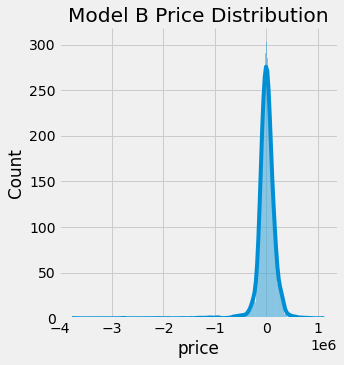

In [64]:
#Create distribution plot to check Model B's distribution of prices.
sns.displot(x=resid_b,kind='hist',kde=True)
plt.title('Model B Price Distribution');

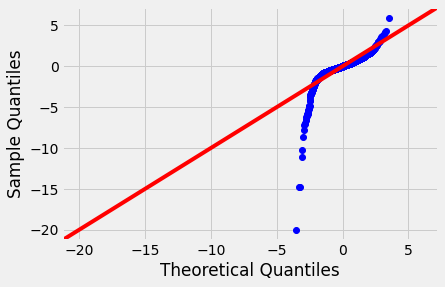

In [65]:
#Create qq plot to further analyze the distribution of the data.
fig = sm.graphics.qqplot(resid_b, dist=stats.norm, line='45',fit=True)

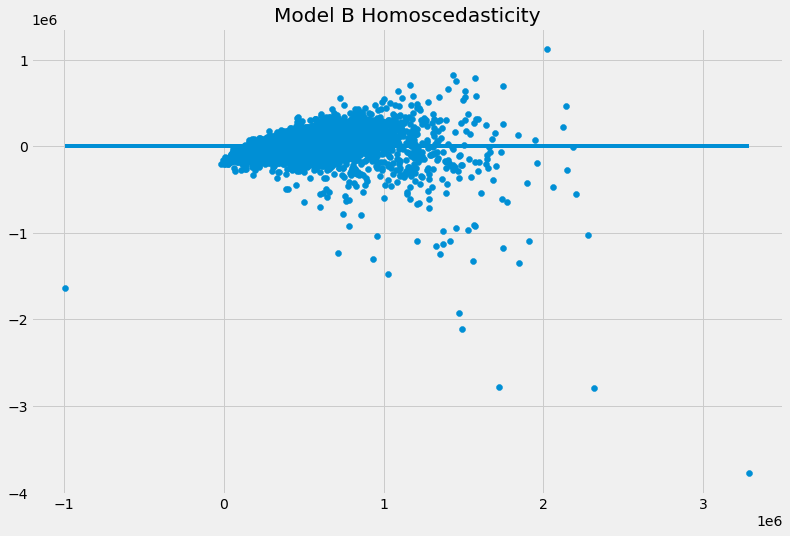

In [66]:
plot_scatter(y_test_pred_b, resid_b, 'Model B Homoscedasticity')

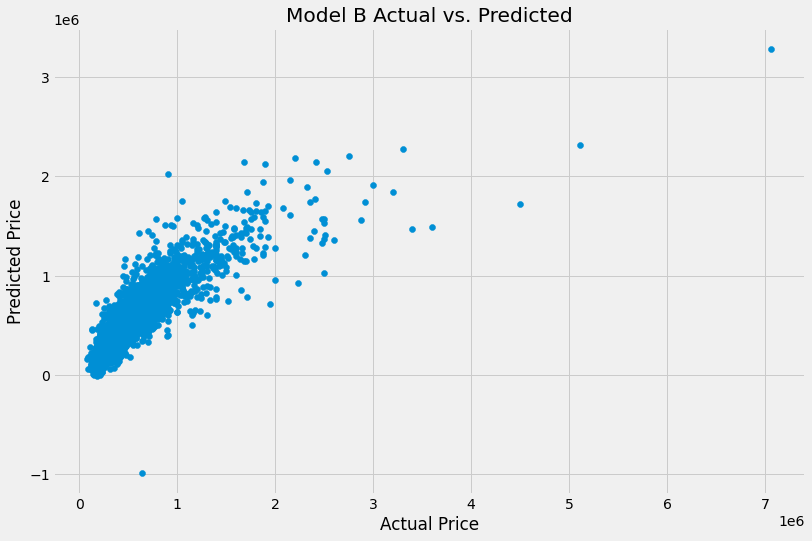

In [67]:
plot_model(y_test, y_test_pred_b, 'Model B Actual vs. Predicted')

# Model C

## Remove Outliers

 - Will remove outliers for certain features in order to make the data more normally distributed and address high skewness and kurtosis from Model's A and B.

In [68]:
X_train.bathrooms.mean()

2.1145598194130923

In [69]:
X_train.bathrooms.std()

0.767680387707009

In [70]:
X_train.bedrooms.mean()

3.3748914742142735

In [71]:
X_train.bedrooms.std()

0.9044034413433618

In [72]:
def upper_outliers(feature):
    upper_limit = feature.mean() + 3*feature.std()
    return upper_limit

In [73]:
upper_limit_baths = upper_outliers(ohe_df.bathrooms)
upper_limit_baths

4.422779162125593

In [74]:
#Find the upper limit of three standard deviations for 'bathrooms'. 
#upper_limit = X_train.bathrooms.mean() + 3*X_train.bathrooms.std()
#upper_limit

In [75]:
upper_limit_beds = upper_outliers(ohe_df.bedrooms)
upper_limit_beds

6.152096665105352

In [76]:
#Find the upper limit of three standard deviations for 'bedrooms'.
#upper_limit_beds = df_filtered.bedrooms.mean() + 3*df_filtered.bedrooms.std()
#upper_limit_beds

In [77]:
def lower_outliers(feature):
    lower_limit = feature.mean() - 3*feature.std()
    return lower_limit

In [78]:
lower_limit_beds = lower_outliers(ohe_df.bedrooms)
lower_limit_beds

0.5943032978524658

In [79]:
lower_limit_baths = lower_outliers(ohe_df.bathrooms)
lower_limit_baths

-0.19112661779073248

In [80]:
#Find the lower limit of three deviations for 'bathrooms'.
#lower_limit = df_filtered.bathrooms.mean() - 3*df_filtered.bathrooms.std()
#lower_limit

In [81]:
#Find the lower limit of three standard deviations for 'bedrooms'.
#lower_limit_beds = df_filtered.bedrooms.mean() - 3*df_filtered.bedrooms.std()
#lower_limit_beds

In [82]:
upper_limit_price = upper_outliers(ohe_df.price)
upper_limit_price

1642400.9938097629

In [83]:
#Find the upper limit of three standard deviations for 'price'.
#upper_limit_price = df_filtered.price.mean() + 3*df_filtered.price.std()
#upper_limit_price

In [84]:
lower_limit_price = lower_outliers(ohe_df.price)
lower_limit_price

-561807.8467986039

In [85]:
#Find the lower limit of three standard deviations for 'price'.
#lower_limit_price = df_filtered.price.mean() - 3*df_filtered.price.std()
#lower_limit_price

In [86]:
upper_limit_sqft = upper_outliers(ohe_df.sqft_living)
upper_limit_sqft

4834.640225497222

In [87]:
lower_limit_sqft = lower_outliers(ohe_df.sqft_living)
lower_limit_sqft

-673.9965249832612

In [88]:
upper_limit_lot = upper_outliers(ohe_df.sqft_lot)
upper_limit_lot

139337.3193869822

In [89]:
lower_limit_lot = lower_outliers(ohe_df.sqft_lot)
lower_limit_lot

-109138.50186603024

In [90]:
upper_limit_sqft15 = upper_outliers(ohe_df.sqft_living15)
upper_limit_sqft15

4042.3117333371847

In [91]:
lower_limit_sqft15 = lower_outliers(ohe_df.sqft_living15)
lower_limit_sqft15

-69.07109806376707

In [92]:
#Create new dataframe removing the upper and lower limit outliers for 'bathrooms', 'bedrooms', and 'price'.
df_outliers=df_filtered[(df_filtered.bathrooms<upper_limit_baths) & (df_filtered.bathrooms>lower_limit_baths) 
                        & (df_filtered.bedrooms<upper_limit_beds) & (df_filtered.bedrooms>lower_limit_beds)
                       & (df_filtered.price<upper_limit_price) & (df_filtered.price>lower_limit_price)]
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21040 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21040 non-null  float64
 1   bedrooms       21040 non-null  int64  
 2   bathrooms      21040 non-null  float64
 3   sqft_living    21040 non-null  int64  
 4   sqft_lot       21040 non-null  int64  
 5   floors         21040 non-null  float64
 6   condition      21040 non-null  int64  
 7   grade          21040 non-null  int64  
 8   sqft_above     21040 non-null  int64  
 9   yr_built       21040 non-null  int64  
 10  sqft_living15  21040 non-null  int64  
 11  sqft_lot15     21040 non-null  int64  
 12  lat            21040 non-null  float64
 13  long           21040 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 2.4 MB


In [93]:
outliers_df_2 = ohe_df[(ohe_df.bathrooms<upper_limit_baths) & (ohe_df.bathrooms>lower_limit_baths) 
                        & (ohe_df.bedrooms<upper_limit_beds) & (ohe_df.bedrooms>lower_limit_beds) &
                 (ohe_df.sqft_living<upper_limit_sqft) & (ohe_df.sqft_living>lower_limit_sqft) &
                (ohe_df.sqft_lot<upper_limit_lot) & (ohe_df.sqft_lot>lower_limit_lot) &
                 (ohe_df.sqft_living15<upper_limit_sqft15) & (ohe_df.sqft_living15>lower_limit_sqft15) & 
                        (ohe_df.price<upper_limit_price) & (ohe_df.price>lower_limit_price)]

In [95]:
outliers_df_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'lat', 'long', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipco

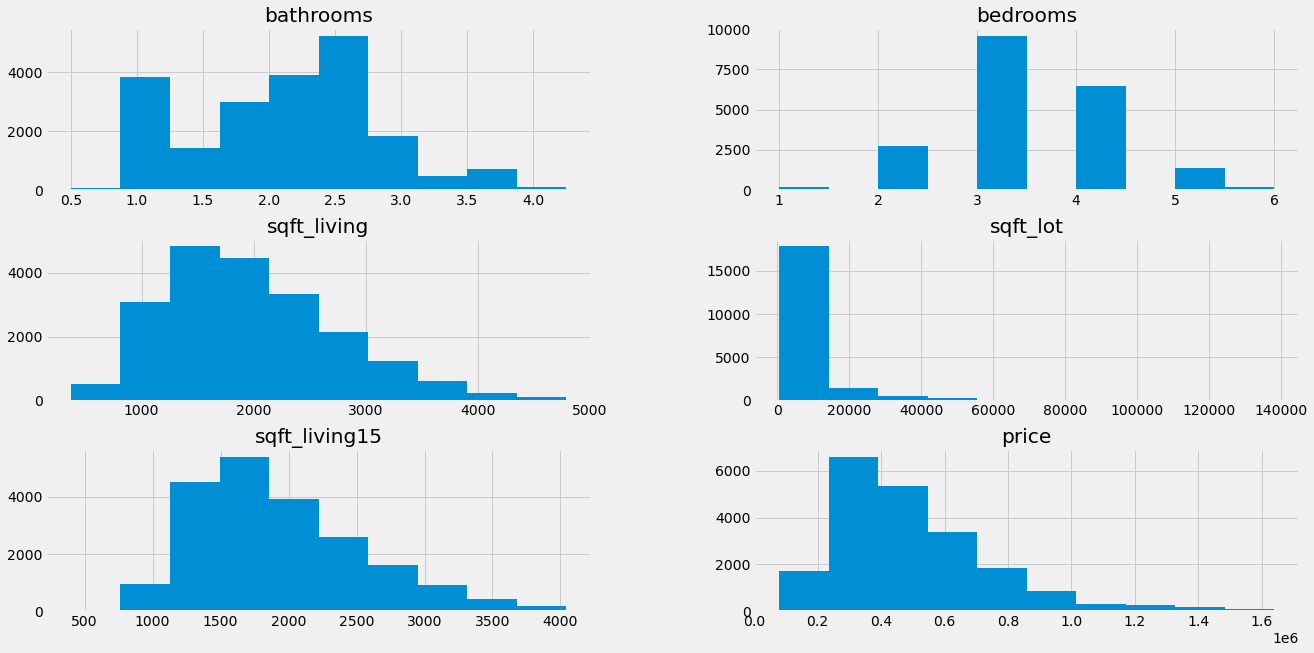

In [96]:
#Check new distributions of the features.
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
outliers_df_2[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'price']].hist(ax = ax);

In [97]:
X_train.columns[:13]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'lat', 'long'],
      dtype='object')

 - bathrooms, lot, sqft_above

In [98]:
#Seperate data into training and testing sets for analysis:
y = outliers_df_2['price']
X = outliers_df_2.drop(['price'], axis=1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X , y, test_size=0.2, random_state=42)

In [ ]:
#Model B training & testing features:
features_train_b = X_train.drop([], axis=1)
features_test_b = X_test.drop(['sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_living15',
                            'sqft_lot15', 'lat', 'long'], axis=1)

In [105]:
#Model C training & testing features:
features_train_c = X_train_2.drop(['sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_living15',
                            'sqft_lot15', 'lat', 'long', 
                                 'zipcode_98024', 'zipcode_98053', 'zipcode_98070', 'zipcode_98126'], axis=1)
features_test_c = X_test_2.drop(['sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_living15',
                            'sqft_lot15', 'lat', 'long', 
                                 'zipcode_98024', 'zipcode_98053', 'zipcode_98070', 'zipcode_98126'], axis=1)

In [106]:
#Scale testing and training features
scale_features = StandardScaler()
scale_features.fit(features_train_c)
X_train_scaled_c = scale_features.transform(features_train_c)
X_test_scaled_c = scale_features.transform(features_test_c)

In [107]:
X_train_scaled_c = pd.DataFrame(X_train_scaled_c, columns = features_train_c.columns)

## Model C Training

In [108]:
def ols_model_2(training_features):
    outcome = 'y_train'
    predictors = training_features
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum

    data = pd.concat([X_train_2, y_train_2], axis=1)

    #Create OLS Model to analyze Model A.
    model_ols = ols(formula=formula, data=data).fit()
    return model_ols.summary()

In [109]:
#Creat Model C OLS model.
ols_model(X_train_scaled_c)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     714.8
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:46:30   Log-Likelihood:            -2.3420e+05
No. Observations:               17277   AIC:                         4.686e+05
Df Residuals:                   17206   BIC:                         4.691e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.796e+06   1.29e+05     13.908      0.000    1.54e+06    2.05e+06
bedrooms      -5.271e+04   2037.186    -25.874      0.000   -5.67e+04   -4.87e+04
bathrooms      2.992e+04   3317.057      9.021      0.000    2.34e+04    3.64e+04
sqft_living     271.2321      2.683    101.105      0.000     265.974     276.490
yr_built       -870.1276     66.081    -13.168      0.000    -999.652    -740.603
zipcode_98001 -1.942e+05   1.31e+04    -14.807      0.000    -2.2e+05   -1.68e+05
zipcode_98002 -1.696e+05   1.68e+04    -10.122      0.000   -2.02e+05   -1.37e+05
zipcode_98003 -1.794e+05   1.44e+04    -12.464      0.000   -2.08e+05   -1.51e+05
zipcode_98004   5.85e+05   1.38e+04     42.460      0.000    5.58e+05    6.12e+05
zipcode_98005  1.482e+05   1.75e+04      8.473      0.000    1.14e+05    1.83e+05
zipcode_98006  1.226e+05   1.18e+04     10.351      0.000    9.94e+04    1.46e+05
zipcode_98007  7.961e+04   1.89e+04      4.202      0.000    4.25e+04    1.17e+05
zipcode_98008  1.195e+05   1.42e+04      8.441      0.000    9.18e+04    1.47e+05
zipcode_98010 -1.167e+05   2.15e+04     -5.416      0.000   -1.59e+05   -7.45e+04
zipcode_98011 -7.557e+04   1.67e+04     -4.531      0.000   -1.08e+05   -4.29e+04
zipcode_98014 -9.818e+04   1.93e+04     -5.075      0.000   -1.36e+05   -6.03e+04
zipcode_98019 -1.219e+05   1.68e+04     -7.266      0.000   -1.55e+05    -8.9e+04
zipcode_98022 -1.479e+05   1.54e+04     -9.610      0.000   -1.78e+05   -1.18e+05
zipcode_98023 -2.051e+05   1.15e+04    -17.778      0.000   -2.28e+05   -1.83e+05
zipcode_98027  -2.13e+04   1.22e+04     -1.740      0.082   -4.53e+04    2700.426
zipcode_98028 -7.455e+04   1.43e+04     -5.220      0.000   -1.03e+05   -4.66e+04
zipcode_98029  4.249e+04   1.37e+04      3.105      0.002    1.57e+04    6.93e+04
zipcode_98030 -1.842e+05    1.5e+04    -12.268      0.000   -2.14e+05   -1.55e+05
zipcode_98031 -1.745e+05   1.43e+04    -12.187      0.000   -2.03e+05   -1.46e+05
zipcode_98032 -1.835e+05      2e+04     -9.184      0.000   -2.23e+05   -1.44e+05
zipcode_98033  1.946e+05   1.24e+04     15.734      0.000     1.7e+05    2.19e+05
zipcode_98034  3.174e+04   1.12e+04      2.840      0.005    9833.028    5.37e+04
zipcode_98038 -1.687e+05   1.12e+04    -15.098      0.000   -1.91e+05   -1.47e+05
zipcode_98039  1.213e+06   2.92e+04     41.498      0.000    1.16e+06    1.27e+06
zipcode_98040  4.168e+05   1.44e+04     29.000      0.000    3.89e+05    4.45e+05
zipcode_98042 -1.749e+05   1.14e+04    -15.401      0.000   -1.97e+05   -1.53e+05
zipcode_98045 -8.156e+04   1.53e+04     -5.343      0.000   -1.11e+05   -5.16e+04
zipcode_98052  5.331e+04   1.12e+04      4.780      0.000    3.15e+04    7.52e+04
zipcode_98055 -1.508e+05   1.43e+04    -10.570      0.000   -1.79e+05   -1.23e+05
zipcode_98056 -8.008e+04   1.25e+04     -6.404   

## Model C Evaluation

Model C produces a higher R-squared than both models A and B. Also the skew and kurtosis have both significantly decreased indicating more evenly distributed data. There is also one zip code with a high p-value likely due to the presence of an outlier. It also appears that sqft_above contributes more to the home price than does sqft_lot and bathrooms according to the coefficiants. Also looking at the coefficiants we can see that certain zip codes are the most important factor in determing the price of the home.  

In [110]:
model_c_lr = LinearRegression()
model_c_lr.fit(X_train_scaled_c ,y_train_2)

LinearRegression()

In [112]:
y_train_pred_c = model_c_lr.predict(X_train_scaled_c)
y_test_pred_c = model_c_lr.predict(X_test_scaled_c)

In [113]:
errors(y_train_2, y_train_pred_c, y_test_2, y_test_pred_c)

Train Mean Absolute Error: 81908
Test Mean Absolute Error: 83185
Train Mean Squared Error: 14047121215
Test Mean Squared Error: 14687536061
Train Root Mean Squared Error: 118521
Test Root Mean Squared Error: 121192


 - On average

In [114]:
resid_c = y_test_pred_c - y_test_2
resid_c

1335     177394.763200
3382     -38673.283731
6741     -78500.539218
17588     38957.092107
13068    -30529.346031
             ...      
10214      6915.776556
10142   -374880.153789
9426      19155.990822
16753     63004.322461
20540    168551.605698
Name: price, Length: 4107, dtype: float64

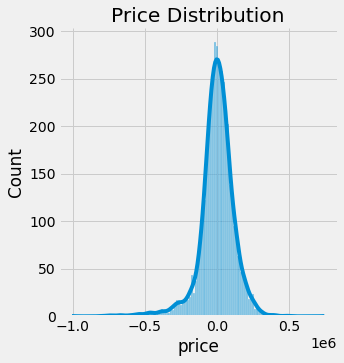

In [115]:
sns.displot(x=resid_c,kind='hist',kde=True)
plt.title('Price Distribution');

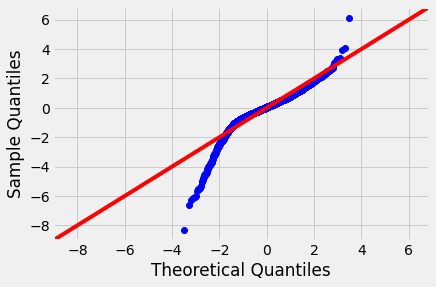

In [116]:
fig = sm.graphics.qqplot(resid_c, dist=stats.norm, line='45',fit=True)

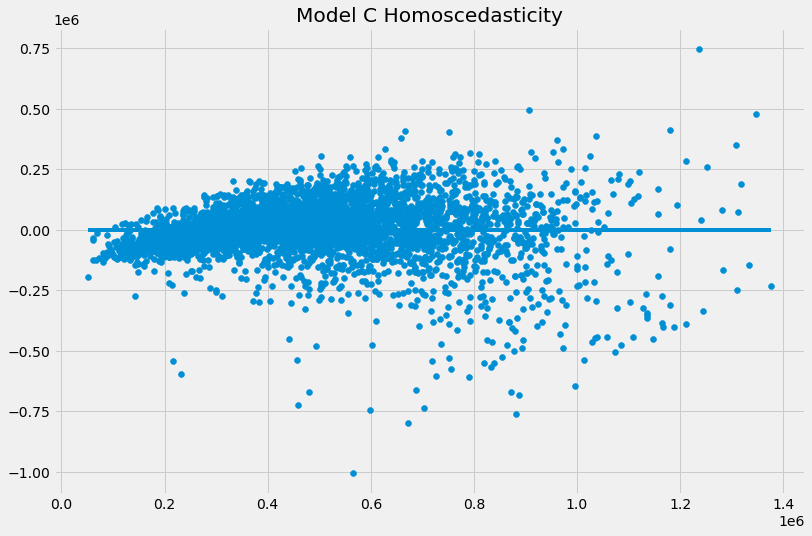

In [117]:
plot_scatter(y_test_pred_c, resid_c, 'Model C Homoscedasticity')

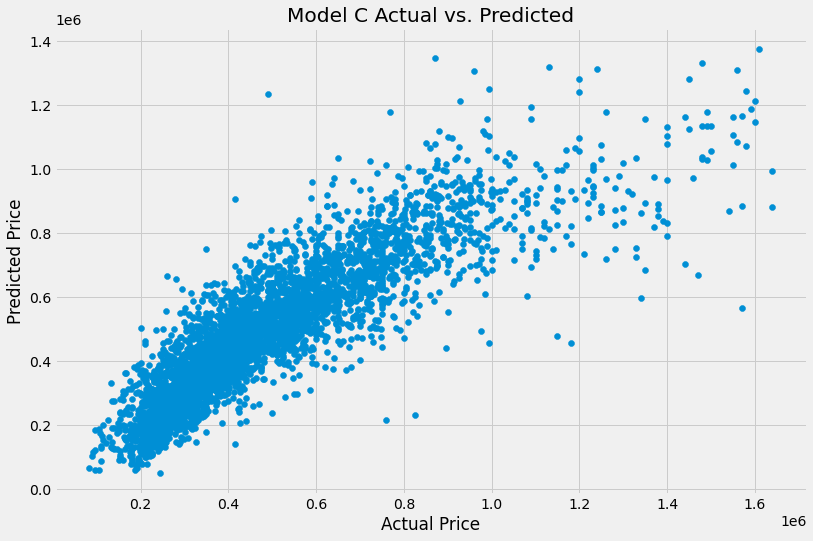

In [119]:
plot_model(y_test_2, y_test_pred_c, 'Model C Actual vs. Predicted')

# Model D

### Remove Outliers

In [ ]:
df_filtered.sqft_living.std()

In [ ]:
df_filtered.sqft_lot.std()

In [ ]:
df_outliers_2=df_outliers[]
df_outliers_2.info()

## Feature Engineering

Will create a new feature consisting of the sum of sqft living and the average sqft living of the nearest 15 neighbors. This should give a better idea of the price due to the grouping of homes in neighborhoods with larger homes also in the area.

In [ ]:
sum_sqft_liv = df_outliers_2['sqft_living'] + df_outliers_2['sqft_living15']
df_outliers_2['sum_sqft_liv'] = sum_sqft_liv
df_outliers_2.head()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_outliers_2.hist(ax = ax);

 - Will create a new feature conisisting of the distance from the homes to Seattle. I would expect home values to increase as they become closer to the city.

In [ ]:
#Seattle Longitude/Latitude
start_lat, start_long = 47.6062, 122.3321

In [ ]:
lat_a = df_outliers_2['lat']
long_a = df_outliers_2['long']

In [ ]:
homes_lat_long = pd.concat([lat_a, long_a], axis=1)
homes_lat_long.head()

In [ ]:
distances_km = []
for row in homes_lat_long.itertuples(index=False):
   distances_km.append(
       haversine_distance(start_lat, start_long, row.lat, row.long)
   )

In [ ]:
homes_lat_long['Distance_From_Seattle'] = distances_km

In [ ]:
homes_lat_long.info()

In [ ]:
price_d = df_outliers_2['price']
grade_d = df_outliers_2['grade']
scaled_grade_d = (grade_d-np.mean(grade_d))/np.sqrt(np.var(grade_d))
bathrooms_d = df_outliers_2['bathrooms']
scaled_bath_d = (bathrooms_d-np.mean(bathrooms_d))/np.sqrt(np.var(bathrooms_d))
bedrooms_d = df_outliers_2['bedrooms']
scaled_bed_d = (bedrooms_d-np.mean(bedrooms_d))/np.sqrt(np.var(bedrooms_d))
sqft_living_d = df_outliers_2['sqft_living']
scaled_sqftl_d = (sqft_living_d-np.mean(sqft_living_d))/np.sqrt(np.var(sqft_living_d))
zip_dummies_d = pd.get_dummies(df_outliers_2['zipcode'], prefix='zip', drop_first=True)
updated_zip_d = zip_dummies_d.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
log_yr_d = np.log(df_outliers_2['yr_built'])
scaled_yr_d = (log_yr_d-np.mean(log_yr_d))/np.sqrt(np.var(log_yr_d))

In [ ]:
sum_sqft_liv_d = df_outliers_2['sum_sqft_liv']
scaled_sqft_liv = (sum_sqft_liv_d-np.mean(sum_sqft_liv_d))/np.sqrt(np.var(sum_sqft_liv_d))

In [ ]:
distance = homes_lat_long['Distance_From_Seattle']
scaled_distance = (distance-np.mean(distance))/np.sqrt(np.var(distance))

## Model D Training

In [ ]:
model_d = pd.concat([price_d, scaled_bath_d, scaled_distance, scaled_grade_d, scaled_sqft_liv, updated_zip_d, scaled_yr_d], axis=1)
model_d.head()

In [ ]:
target_d = model_d['price']
features_d = model_d.drop(['price'], axis=1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(features_d,target_d,test_size=0.2,random_state=42)

In [ ]:
outcome_d = 'y_train_d'
predictors_d = X_train_d
pred_sum_d = '+'.join(predictors_d.columns)
formula_d = outcome_d + '~' + pred_sum_d

In [ ]:
data_d = pd.concat([X_train_d,y_train_d], axis=1)
data_d.head()

In [ ]:
model_d_ols = ols(formula=formula_d, data=data_d).fit()
model_d_ols.summary()

## Model D Evalutation

Model D produces a slighly higher R-squared than Model C at .805. Model D also has significantly lower skew and kurtosis than both Model's A and B while being fairly similar to Model C. All of the p-values in Model D are 0 indicating that all of the features statistically significant. Also looking at the coefficiants it appears that grade and year built contribute more to the home price than bathrooms and distance from Seattle. Finally square foot living as well as certain zip codes appear to be the most significant factors in contributing to the home price according to the coefficiants, this is similar to what was observed in both Model's B and C.

In [ ]:
model_d_lr = LinearRegression()
model_d_lr.fit(X_train_d, y_train_d)

In [ ]:
y_train_pred_d = model_d_lr.predict(X_train_d)
y_test_pred_d = model_d_lr.predict(X_test_d)

In [ ]:
errors(y_train_d, y_train_pred_d, y_test_d, y_test_pred_d)

In [ ]:
resid_d = y_test_pred_d - y_test_d
resid_d

In [ ]:
sns.displot(x=resid_d,kind='hist',kde=True)
plt.title('Price Distribution');

In [ ]:
fig = sm.graphics.qqplot(resid_d, dist=stats.norm, line='45',fit=True)

In [ ]:
plot_scatter(y_test_pred_d, resid_d, 'Model D Homoscedasticity')

In [ ]:
plot_model(y_test_d, y_test_pred_d, 'Model D Actual vs. Predicted')

## Model Comparison

In [ ]:
data = {'R-Squared':[.546, .668, .756, .804],
       'Skew':[3.045, 4.983, 1.292, 1.292],
       'Kurtosis':[30.845, 69.1, 8.668, 9.157],
       'MAE (test)':['160,590', '122,502', '91,518', '77,473'],
       'MSE (test)':['60,591,750,008', '46,626,531,192', '18,263,182,375', '12,325,876,561'],
       'RMSE (test)':['246,153', '215,931', '135,141', '111,021']}
model_comparison = pd.DataFrame(data, index=['Model A', 'Model B', 'Model C', 'Model D'])
model_comparison

## Model Selection

Based on the model comparison above, Model D seems to most accurate of the group with the highest R-Squared, as well as lowest MAE, MSE, and RMSE. 

In [ ]:
#Will run Model D with all the of the data without splitting.
final_model = pd.concat([price_d, scaled_bath_d, scaled_distance, scaled_grade_d, 
                     scaled_sqft_liv, updated_zip_d, scaled_yr_d], axis=1)

In [ ]:
target_e = final_model['price']
features_e = final_model.drop(['price'], axis=1)

In [ ]:
outcome_e = 'price'
predictors_e = final_model.drop(['price'], axis=1)
pred_sum_e = '+'.join(predictors_e.columns)
formula_e = outcome_e + '~' + pred_sum_e

In [ ]:
final_model_ols = ols(formula=formula_e, data=final_model).fit()
final_model_ols.summary()

In [ ]:
final_model_e = LinearRegression()
final_model_e.fit(features_e, target_e)

In [ ]:
y_pred_e = final_model_e.predict(features_e)

In [ ]:
print('Train Mean Absolute Error:',metrics.mean_absolute_error(target_e, y_pred_e))

In [ ]:
print('Train Mean Squared Error:',metrics.mean_squared_error(target_e, y_pred_e))

In [ ]:
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(target_e, y_pred_e)))

Running the model with all of the data produces a result very similar to the Model D results. This indicates that this model does not appear to be overfitting the data.

## Conclusions/Summary

Overall it appears that both Zip Codes and Square foot living, Square foot above, and Sum square foot living tend to be the most important factors in determining the actual price of homes. In models B, C, and D these two features produce the highest coeffiecients indicating that they have the stongest relationship with the dependent variable of price. This finding remains true as the models become more accurate and the data becomes more normally distributed accross different models. One interestering finding is that in model A we observed that Square foot living appeared to be the lowest coeffiecient, however this is likely due to the fact that the features were not scaled in this particular model, whereas in models B, C, and D all features were scaled before running the models.  

## Model D Graphs of Features vs. Price

In [ ]:
x = df_outliers_2['sum_sqft_liv']
y = df_outliers_2['price']
plt.figure(figsize=(12,8))
plt.xlabel('Sum Sqft Living')
plt.ylabel('Home Price')
plt.title('Sum Sqft Living vs. Price')
sns.regplot(x, y);

In [ ]:
x = homes_lat_long['Distance_From_Seattle']
y = df_outliers_2['price']
plt.figure(figsize=(12,8))
plt.xlabel('Distance')
plt.ylabel('Home Price')
plt.title('Distance From Seattle vs. Price')
sns.regplot(x, y);

In [ ]:
grouped_grade = df_outliers_2.groupby('grade').mean()
grouped_grade.reset_index(inplace=True)
grouped_grade

In [ ]:
grouped_baths = df_outliers_2.groupby('bathrooms').mean()
grouped_baths.reset_index(inplace=True)
grouped_baths.head()

In [ ]:
x = grouped_grade['grade']
y = grouped_grade['price']
plt.figure(figsize=(12,8))
plt.xlabel('Grade')
plt.ylabel('Home Price')
plt.title('Grade vs. Price')
sns.regplot(x, y);

In [ ]:
x = grouped_baths['bathrooms']
y = grouped_baths['price']
plt.figure(figsize=(12,8))
plt.xlabel('Bathrooms')
plt.ylabel('Home Price')
plt.title('Bathrooms vs. Price')
sns.regplot(x, y);